In [1]:
# Loading of all necessary imports
# Using Seaborn instead of matplotlib for most plots as it has more powerful plots out of the box
import pandas as pd
from os import listdir
from os.path import join
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import seaborn as sns
import numpy as np
from matplotlib import colors
from datetime import datetime 

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels
from statsmodels.regression.mixed_linear_model import MixedLMParams

In [2]:
# Local source of data
data_path = "../data/"
sns.set_theme()

In [3]:
participant_path = join(data_path, "processed", "participant_data.csv.gz")
df_participants = pd.read_csv(participant_path, compression='gzip')
df_participants.set_index("participant_id", inplace=True)


daily_path = join(data_path, 'processed', 'daily_data.csv.gz')
df_daily = pd.read_csv(daily_path, compression='gzip')

df_daily = pd.read_csv(daily_path, compression='gzip')
df_daily['Wear Time'] = df_daily['Cardio_minutes'] + df_daily['Fat Burn_minutes'] + df_daily['Out of Range_minutes'] + df_daily['Peak_minutes']
df_daily = df_daily[df_daily['Wear Time'] > 240]
df_test = df_daily.merge(df_participants, on='participant_id', how='inner', suffixes=(None, '_survey'))
df = df_test[['participant_id', 'ex_Total','age', 'gender', 'shift', 'RestingHeartRate']].copy()
df = df[df['ex_Total'] > 0]
df.dropna(inplace=True)
df['age'] = df['age'] /5 -5
df['age'] = df['age'].apply(lambda x: 0 if x < 0 else x)

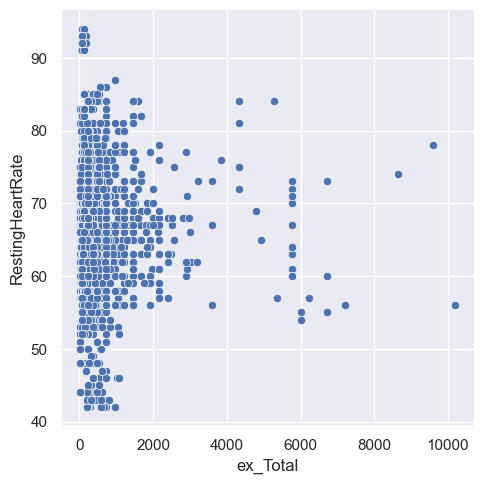

In [4]:
sns.relplot(x=df['ex_Total'], y=df['RestingHeartRate'])

In [10]:
df.describe()

,ex_Total,age,gender,shift,RestingHeartRate
count,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000
mean,524.124440,2.508505,1.692927,1.336616,66.085944
std,865.429765,1.778402,0.461383,0.472658,8.315474
min,4.000000,0.000000,1.000000,1.000000,42.000000
25%,140.000000,1.000000,1.000000,1.000000,61.000000
50%,320.000000,2.000000,2.000000,1.000000,66.000000
75%,519.000000,4.000000,2.000000,2.000000,71.000000
max,10200.000000,5.000000,2.000000,2.000000,94.000000


In [5]:
df

,participant_id,ex_Total,age,gender,shift,RestingHeartRate
1,02581754-36cd-4b23-85ea-bf995c6dec83,1920.0,0.0,1,2.0,59.0
3,02581754-36cd-4b23-85ea-bf995c6dec83,720.0,0.0,1,2.0,62.0
9,02581754-36cd-4b23-85ea-bf995c6dec83,800.0,0.0,1,2.0,59.0
17,02581754-36cd-4b23-85ea-bf995c6dec83,600.0,0.0,1,2.0,61.0
18,02581754-36cd-4b23-85ea-bf995c6dec83,600.0,0.0,1,2.0,61.0
...,...,...,...,...,...,...
12615,fd79ab30-1199-4619-adbd-577d715d86ce,220.0,4.0,2,1.0,73.0
12617,fd79ab30-1199-4619-adbd-577d715d86ce,220.0,4.0,2,1.0,73.0
12653,fdbd8c07-720c-4ae5-a3d8-aad56b54688c,520.0,5.0,2,1.0,76.0
12655,fdbd8c07-720c-4ae5-a3d8-aad56b54688c,540.0,5.0,2,1.0,73.0


In [6]:
model = smf.mixedlm('RestingHeartRate ~ ex_Total + age + C(gender) + C(shift)', groups=df['participant_id'], data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
==============================================================
Model:            MixedLM Dependent Variable: RestingHeartRate
No. Observations: 2234    Method:             REML            
No. Groups:       182     Scale:              6.5371          
Min. group size:  1       Log-Likelihood:     -5657.1955      
Max. group size:  35      Converged:          Yes             
Mean group size:  12.3                                        
--------------------------------------------------------------
                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept           65.369    1.325 49.350 0.000 62.772 67.965
C(gender)[T.2]       0.482    1.201  0.401 0.688 -1.872  2.836
C(shift)[T.2.0]      0.241    1.176  0.205 0.838 -2.064  2.546
ex_Total             0.000    0.000  0.878 0.380 -0.000  0.000
age                  0.379    0.329  1.151 0.250 -0.266  1.024
Group Var           55.273    2.445                           
==============================================================

"""

In [7]:
for table in result.summary().tables:
    print(table.to_latex())

\begin{tabular}{lllll}
\toprule
{} &                  0 &        1 &                    2 &                 3 \\
\midrule
0 &             Model: &  MixedLM &  Dependent Variable: &  RestingHeartRate \\
1 &  No. Observations: &     2234 &              Method: &              REML \\
2 &        No. Groups: &      182 &               Scale: &            6.5371 \\
3 &   Min. group size: &        1 &      Log-Likelihood: &        -5657.1955 \\
4 &   Max. group size: &       35 &           Converged: &               Yes \\
5 &   Mean group size: &     12.3 &                      &                   \\
\bottomrule
\end{tabular}

\begin{tabular}{lllllll}
\toprule
{} &   Coef. & Std.Err. &       z &  P>|z| &  [0.025 &  0.975] \\
\midrule
Intercept       &  65.369 &    1.325 &  49.350 &  0.000 &  62.772 &  67.965 \\
C(gender)[T.2]  &   0.482 &    1.201 &   0.401 &  0.688 &  -1.872 &   2.836 \\
C(shift)[T.2.0] &   0.241 &    1.176 &   0.205 &  0.838 &  -2.064 &   2.546 \\
ex\_Total        &   0.00

C:\Users\bgrem\AppData\Local\Temp\ipykernel_11428\3406381553.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table.to_latex())


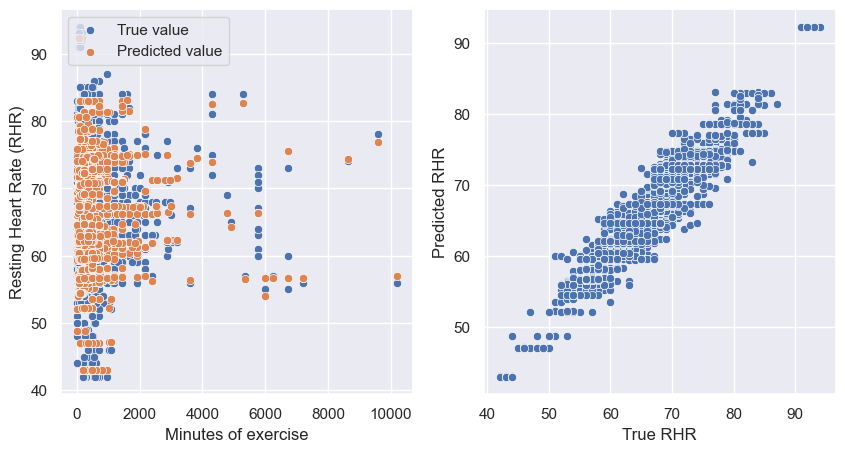

In [8]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
img = sns.scatterplot(ax=axes[0], x=df['ex_Total'], y=df['RestingHeartRate'])
img = sns.scatterplot(ax=axes[0], x=df['ex_Total'], y=result.fittedvalues)
img.set(xlabel='Minutes of exercise', ylabel='Resting Heart Rate (RHR)')
img.legend(loc='upper left', labels=['True value', 'Predicted value'])

img2 = sns.scatterplot(ax=axes[1], y=result.fittedvalues, x=df['RestingHeartRate'])
img2.set(xlabel='True RHR', ylabel='Predicted RHR')
fig.savefig('../activityHeartRatePlot.jpg')